In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

%matplotlib inline
%config InlineBackend.figure_format ="retina" 
https://www.imdb.com/title/tt0898266/episodes/?ref_=tt_eps
url = ""


while True:

    driver = webdriver.Chrome(service=Service("../../../driver/chromedriver-linux64/chromedriver"))  ## 크롬 드라이버 위치 재설정
    driver.get(url)
    time.sleep(3)
    try:
        page = driver.page_source
        soup = BeautifulSoup(page, "html.parser")
        if soup.find("html")["lang"] == "en-US":
            break
    except:
        
        driver.close()

dram_df = []
for idx in range(12, 0, -1):

    tab_list = driver.find_element(By.XPATH, f'''//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul/li[{idx}]''')
    tab_list.click()
    time.sleep(3)

    second_page = driver.page_source
    second_soup = BeautifulSoup(second_page, "html.parser")
    page_data = second_soup.find_all( class_ = "sc-1318654d-4 efHMwW")

    for drama_info in page_data:

        round_data = drama_info.find("a", class_ = "sc-1318654d-8 bglHll").text.split("∙")
        season, round = (round_data[0].split(".")[0], round_data[0].split(".")[1])
        date = drama_info.find("span", class_ = "sc-1318654d-10 jEHgCG").text
        rating_tag = drama_info.find("span", 
                                    class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating")
        rate=  rating_tag["aria-label"].split(":")[1].lstrip()

        drama_info_dic = {}

        drama_info_dic["시즌"] = season
        drama_info_dic["회차"] = round
        drama_info_dic["상영일"] = date
        drama_info_dic["평점"] = rate

        dram_df.append(drama_info_dic)

drama_df = pd.DataFrame(dram_df)
drama_df.to_csv("../../../data/drama_df.csv")  
drama_df.to_csv("../../../data/drama_df.csv")  
drama_df.drop(columns= "Unnamed: 0", inplace=True)
drama_df = pd.pivot_table(data=drama_df, index = "시즌" ,aggfunc=np.sum)

plt.figure(figsize = (12,8))
plt.bar(drama_df.index, drama_df["평점"], label = "평점")
plt.legend(loc = "upper right")
plt.show()

print(drama_df)


      시즌    회차                 상영일   평점
0     S1   E0          May 1, 2006  6.5
1     S1   E1   September 24, 2007  8.2
2     S1   E2      October 1, 2007  8.2
3     S1   E3      October 8, 2007  7.6
4     S1   E4     October 15, 2007  8.0
..   ...   ...                 ...  ...
275  S12  E20       April 25, 2019  7.1
276  S12  E21          May 2, 2019  7.2
277  S12  E22          May 9, 2019  7.9
278  S12  E23         May 16, 2019  9.0
279  S12  E24         May 16, 2019  9.5

[280 rows x 4 columns]


In [5]:
drama_df = pd.read_csv("../../../data/drama_df.csv")
drama_df

,Unnamed: 0,시즌,회차,상영일,평점
0,0,S1,E0,"May 1, 2006",6.5
1,1,S1,E1,"September 24, 2007",8.2
2,2,S1,E2,"October 1, 2007",8.2
3,3,S1,E3,"October 8, 2007",7.6
4,4,S1,E4,"October 15, 2007",8.0
...,...,...,...,...,...
275,275,S12,E20,"April 25, 2019",7.1
276,276,S12,E21,"May 2, 2019",7.2
277,277,S12,E22,"May 9, 2019",7.9
278,278,S12,E23,"May 16, 2019",9.0


In [7]:
drama_df.drop(columns= "Unnamed: 0", inplace=True)

In [10]:
import numpy as np
drama_df = pd.pivot_table(data=drama_df, index = "시즌" ,aggfunc=np.sum)
drama_df.sort_values("평점", ascending=False)

,상영일,평점,회차
시즌,,,
S4,"September 23, 2010September 30, 2010October 7,...",193.1,E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14...
S6,"September 27, 2012October 4, 2012October 11, 2...",190.8,E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14...
S5,"September 22, 2011September 22, 2011September ...",190.6,E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14...
S3,"September 21, 2009September 28, 2009October 5,...",188.9,E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14...
S2,"September 22, 2008September 29, 2008October 6,...",188.5,E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14...
S7,"September 26, 2013September 26, 2013October 3,...",188.5,E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14...
S9,"September 21, 2015September 28, 2015October 5,...",181.6,E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14...
S8,"September 22, 2014September 22, 2014September ...",179.1,E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14...
S12,"September 24, 2018September 27, 2018October 4,...",178.7,E1 E2 E3 E4 E5 E6 E7 E8 E9 E10 E11 E12 E13 E14...


In [17]:
drama_df.index[0][1]

'1'

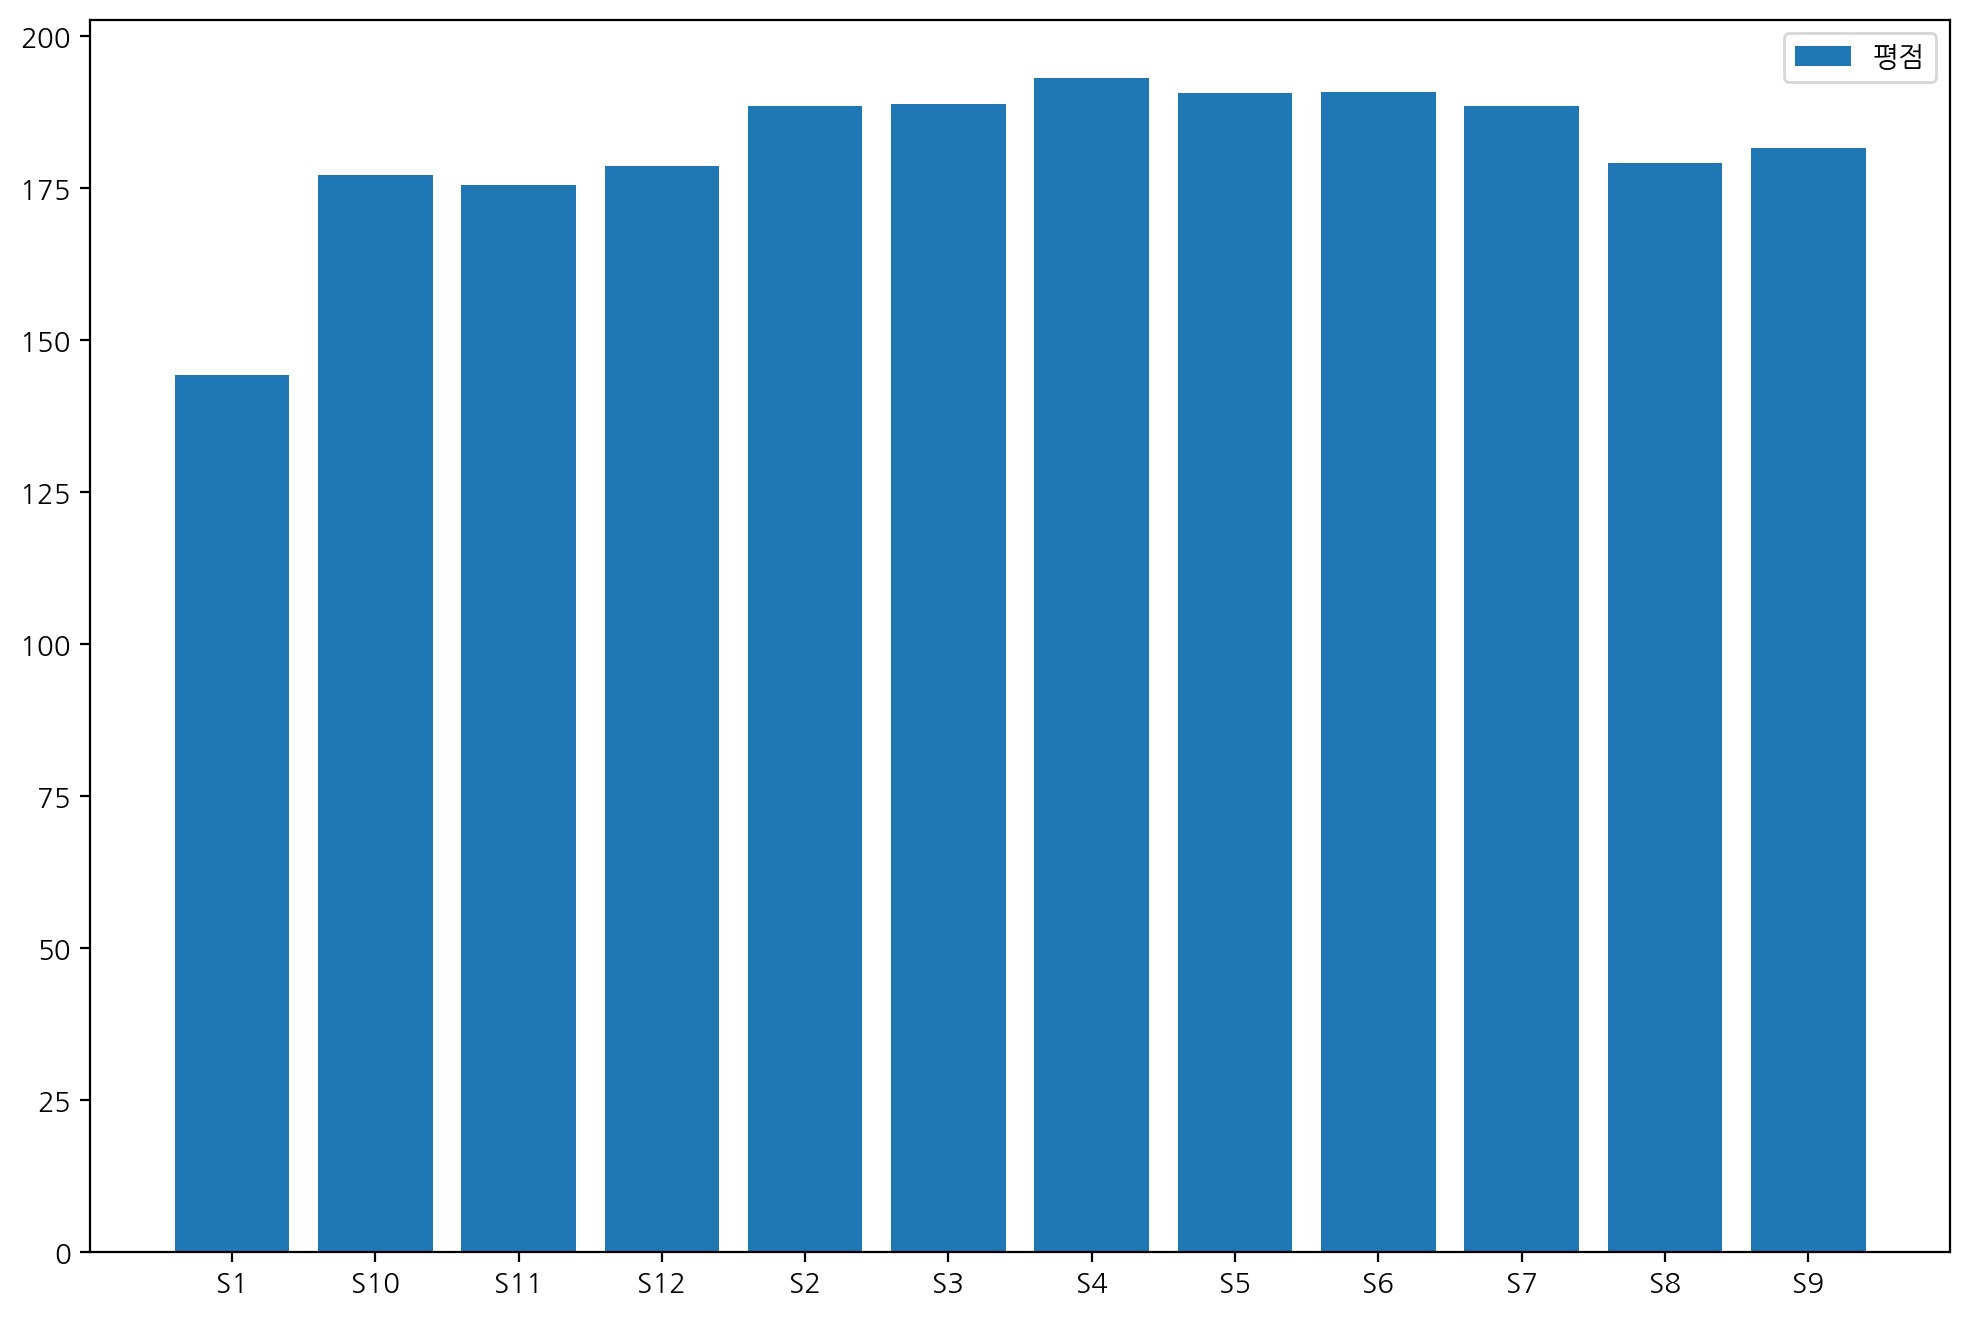

In [24]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

%matplotlib inline
%config InlineBackend.figure_format ="retina" 

plt.figure(figsize = (12,8))
plt.bar(drama_df.index, drama_df["평점"], label = "평점")
plt.legend(loc = "upper right")
plt.show()